In [1]:
import networkx as nx
import random
import math

In [2]:
G = nx.Graph()

In [3]:
G.add_node(1,contracted=False)
G.add_node(2,contracted=False)
G.add_node(3,contracted=False)
G.add_node(4,contracted=False)
G.add_node(5,contracted=False)
G.add_node(6,contracted=False)
G.add_node(7,contracted=False)
G.add_node(8,contracted=False)
G.add_node(9,contracted=False)
G.add_node(10,contracted=False)
G.add_node(11,contracted=False)
G.add_node(12,contracted=False)
G.add_node(13,contracted=False)
G.add_node(14,contracted=False)

In [4]:
edges = [
    (1,2,{'weight':10}),
    (1,3,{'weight':4}),
    (1,7,{'weight':7}),
    (2,3,{'weight':5}),
    (2,4,{'weight':2}),
    (3,4,{'weight':2}),
    (3,6,{'weight':1}),
    (4,5,{'weight':5}),
    (5,10,{'weight':7}),
    (6,7,{'weight':4}),
    (6,5,{'weight':3}),
    (6,9,{'weight':1}),
    (7,8,{'weight':6}),
    (8,9,{'weight':3}),
    (8,13,{'weight':5}),
    (9,12,{'weight':1}),
    (9,10,{'weight':3}),
    (10,11,{'weight':4}),
    (11,12,{'weight':3}),
    (11,13,{'weight':4}),
    (12,13,{'weight':2})
]

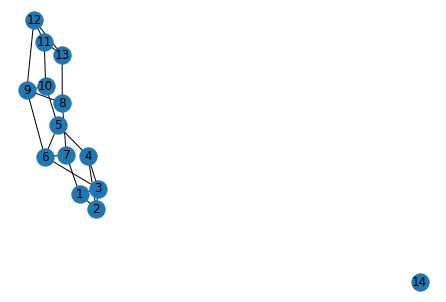

In [5]:
G.add_edges_from([*edges])
nx.draw(G,with_labels=True)

In [6]:
def dijkstra_with_contraction(G, source, destination, contracted = None):
    nx.set_node_attributes(G, {contracted: True}, 'contracted')
        
    shortest_path = dict()
    heap = list()
    
    for i in G.nodes():
        if not nx.get_node_attributes(G, 'contracted')[i]:
            shortest_path[i] = math.inf
            heap.append(i)
    shortest_path[source] = 0
    
    while len(heap) > 0:
        q = min(heap, key = lambda node : shortest_path[node])
        if q == destination:
            nx.set_node_attributes(G, {contracted: False}, 'contracted')
            return shortest_path[q]
        heap.remove(q)
        for v in G[q]:
            if not nx.get_node_attributes(G, 'contracted')[v]:
                distance = shortest_path[q] + G[q][v]['weight']
                if distance < shortest_path[v]:
                    shortest_path[v] = distance
    nx.set_node_attributes(G, {contracted: False}, 'contracted')
    return math.inf

In [8]:
shortest_paths = dict()
for i in G.nodes():
    shortest_paths[i] = dict()
    for j in G.nodes():
        shortest_paths[i][j] = dijkstra_with_contraction(G, i, j)

In [ ]:
for i in G.nodes():
    edges_incident = len(G[i])
    
    contracted_node_paths = shortest_paths[i]
    del shortest_paths[i]
    
    new_graph = [*G.nodes()] # excluding the node that we have just contracted
    new_graph.remove(i)
    
    new_shortest_paths = dict()
    
    for source in new_graph:
        new_shortest_paths[source] = dict()
        for destination in new_graph:
            new_shortest_paths[source][destination] = dijkstra_with_contraction(G, \
                                                                                source, \
                                                                                destination, \
                                                                                contracted = i)
    shortcuts = 0
    
    for node in new_shortest_paths:
        SP_contracted = new_shortest_paths[node]
        SP_original = shortest_paths[node]
        for elem in SP_contracted:
            if SP_contracted[elem] != SP_original[elem]:
                shortcuts += 1
            
    shortest_paths[i] = contracted_node_paths
    
    ED = shortcuts - edges_incident
    edge_difference.append((i, ED))

In [ ]:
edge_difference